In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

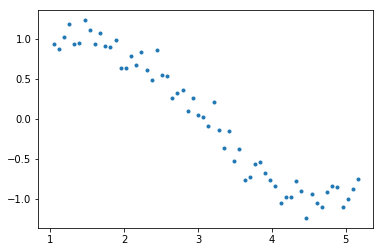

In [2]:
np.random.seed(42)
x = np.array([i * np.pi / 180 for i in range(60, 300, 4)])

y = np.sin(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])
plt.plot(data['x'], data['y'], '.')
plt.show()

In [3]:
data.head()

,x,y
0,1.047198,0.940533
1,1.117011,0.878054
2,1.186824,1.024337
3,1.256637,1.179511
4,1.326450,0.935173


In [4]:
for i in range(2, 16):
    colname = 'x_%d' % i
    data[colname] = data['x'] ** i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,0.940533,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.878054,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.024337,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,1.179511,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,0.935173,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


## Обычная регрессия

#### Линейная регрессия
$$RSS = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j * x_{ij})^2$$

In [6]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    # predictors:
    predictors=['x']
    if power >= 2:
        predictors.extend(['x_%d' % i for i in range(2, power + 1)])
    
    # fit
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    
    # models to plot
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for power: %d' % power)
    
    # Return the result in pre-defined format
    rss = sum((y_pred - data['y']) ** 2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

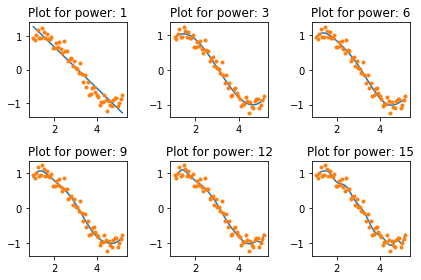

In [7]:
#Initialize a dataframe to store the results:
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['model_pow_%d' % i for i in range(1, 16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1: 231, 3: 232, 6: 233, 9: 234, 12: 235, 15: 236}

#Iterate through all powers and assimilate results
for i in range(1, 16):
    coef_matrix_simple.iloc[i - 1, 0:i + 2] = linear_regression(
        data,
        power=i,
        models_to_plot=models_to_plot
    )

In [8]:
# Set the display float format
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,2.8,1.9,-0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,2.7,2.1,-0.74,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,0.99,-0.59,2.5,-1.1,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,0.96,0.2,1.2,-0.4,-0.044,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,0.96,0.23,1.1,-0.34,-0.066,0.017,-0.00024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.93,-6.2,17,-16,7.9,-2.1,0.28,-0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.91,-18,52,-58,34,-12,2.3,-0.24,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.91,-5.9,11,-0.26,-10,9,-3.6,0.77,-0.086,0.0039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.91,7.7,-41,85,-88,53,-20,4.5,-0.63,0.049,-0.0016,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.89,2.5e+02,-1.1e+03,2e+03,-2.1e+03,1.4e+03,-6.1e+02,1.8e+02,-36,4.5,-0.33,0.01,NaN,NaN,NaN,NaN,NaN


## Ridge регрессия

#### Ridge
$$RSS = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j * x_{ij})^2 + \lambda \sum_{j=1}^p \beta_j^2$$

In [9]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    # Fit
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g' % alpha)
    
    # format
    rss = sum((y_pred-data['y']) ** 2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\Users\rajah\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.493840e-17
  overwrite_a=True).T


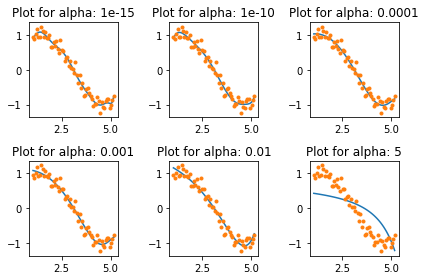

In [11]:
# X initialization
predictors = ['x']
predictors.extend(['x_%d' % i for i in range(2, 16)])

# different alphas
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

# create dataframe to save coefficients
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['alpha_%.2g' % alpha_ridge[i] for i in range(0, 10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15: 231, 1e-10: 232, 1e-4: 233, 1e-3: 234, 1e-2: 235, 5: 236}
for i in range(10):
    coef_matrix_ridge.iloc[i, ] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)
plt.show()

In [13]:
# Set the display float format
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.88,52,-2e+02,3.2e+02,-2.8e+02,1.4e+02,-37,4.3,0.49,-0.25,0.031,0.0031,-0.0014,-7.4e-05,9.2e-05,-1.5e-05,7.8e-07
alpha_1e-10,0.91,-8.8,23,-20,7.3,-0.8,-0.18,0.023,0.0075,-1.9e-05,-0.00027,-3.6e-05,5.2e-06,2.2e-06,3.8e-08,-1.1e-07,1e-08
alpha_1e-08,0.92,-3,8,-5.2,1.1,0.039,-0.029,-0.0042,0.00017,0.00015,2.7e-05,1.6e-06,-4.3e-07,-1.6e-07,-2.6e-08,-1.1e-09,1.2e-09
alpha_0.0001,0.96,0.76,0.44,-0.15,-0.024,-0.0016,0.00016,8.3e-05,1.9e-05,3.1e-06,3.8e-07,2.2e-08,-5e-09,-2.2e-09,-4.7e-10,-5.6e-11,6.2e-12
alpha_0.001,1,1.1,0.11,-0.084,-0.016,-0.0019,-8.7e-05,2.7e-05,1.1e-05,2.5e-06,4.7e-07,7.4e-08,9.1e-09,5.6e-10,-1.4e-10,-7.6e-11,-2.4e-11
alpha_0.01,1.2,1.4,-0.19,-0.049,-0.0083,-0.0011,-8.7e-05,3.1e-06,3.4e-06,1e-06,2.2e-07,4.1e-08,6.5e-09,8.3e-10,5.3e-11,-1.4e-11,-7.9e-12
alpha_1,5.5,0.94,-0.15,-0.02,-0.003,-0.00046,-6.9e-05,-9.7e-06,-1.2e-06,-1.3e-07,-7.6e-09,1.7e-09,8.6e-10,2.6e-10,6.6e-11,1.5e-11,3.5e-12
alpha_5,14,0.5,-0.06,-0.0086,-0.0014,-0.00024,-4.1e-05,-6.8e-06,-1.1e-06,-1.9e-07,-3e-08,-4.9e-09,-7.7e-10,-1.2e-10,-1.8e-11,-2.5e-12,-3.2e-13
alpha_10,18,0.35,-0.038,-0.0056,-0.00095,-0.00017,-2.9e-05,-5.2e-06,-9.1e-07,-1.6e-07,-2.8e-08,-5e-09,-8.8e-10,-1.5e-10,-2.7e-11,-4.8e-12,-8.4e-13
alpha_20,23,0.23,-0.023,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.5e-07,-1.2e-07,-2.2e-08,-4e-09,-7.3e-10,-1.3e-10,-2.5e-11,-4.5e-12,-8.4e-13


In [14]:
coef_matrix_ridge.apply(lambda x: sum(x.values == 0), axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

## Lasso регрессия

#### Lasso
$$RSS = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_j * x_{ij})^2 + \lambda \sum_{j=1}^p |\beta_j|$$

In [15]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, models_to_plot={}):
    # fit
    lassoreg = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors], data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g' % alpha)
    
    # format
    rss = sum((y_pred-data['y']) ** 2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\rajah\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\rajah\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\rajah\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


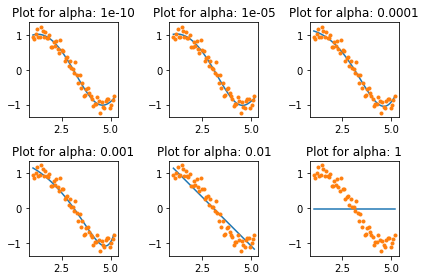

In [16]:
predictors = ['x']
predictors.extend(['x_%d' % i for i in range(2, 16)])

# alphas
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# create dataframe to store coefficients
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['alpha_%.2g' % alpha_lasso[i] for i in range(0, 10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-10: 231, 1e-5: 232, 1e-4: 233, 1e-3: 234, 1e-2: 235, 1: 236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i, ] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)
plt.show()

In [17]:
# Set the display float format
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.44,0.89,-0.34,-0.00045,-0.00059,-7.5e-06,7e-05,2.3e-05,4.1e-06,4.2e-07,-1.1e-08,-1.7e-08,-4.5e-09,-7.1e-10,-2.6e-11,3.1e-11
alpha_1e-10,0.96,0.44,0.89,-0.34,-0.00045,-0.00059,-7.5e-06,7e-05,2.3e-05,4.1e-06,4.2e-07,-1.1e-08,-1.7e-08,-4.5e-09,-7.1e-10,-2.6e-11,3.1e-11
alpha_1e-08,0.96,0.43,0.89,-0.34,-0.00034,-0.00059,-6.1e-06,7e-05,2.3e-05,4e-06,4.1e-07,-7.7e-09,-1.7e-08,-4.5e-09,-7e-10,-2.4e-11,3e-11
alpha_1e-05,0.96,0.59,0.71,-0.27,-0.0093,-0,0,8e-05,2.5e-05,9e-07,0,0,0,-0,-0,-0,-1.7e-11
alpha_0.0001,1,1.2,0,-0.047,-0.027,-0,0,0,1.1e-05,4.8e-06,0,0,0,0,-0,-0,-1.2e-11
alpha_0.001,1.3,1.4,-0.083,-0.11,-0,-0,0,0,0,0,0,0,9e-09,2e-09,0,0,0
alpha_0.01,3.1,1.7,-0.56,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0,0,0
alpha_1,37,-0.0088,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,-0.0088,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,-0.0088,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [18]:
coef_matrix_lasso.apply(lambda x: sum(x.values == 0), axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     11
alpha_0.01      14
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64